In [1]:
import torch
from diffusers import FluxPipeline

In [2]:
path = "pretrained_models/FLUX.1-dev"
pipe = FluxPipeline.from_pretrained(path, torch_dtype=torch.bfloat16)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


In [3]:
prompt = "A cat holding a sign that says hello world"
image = pipe(
    prompt,
    width=512,
    height=512,
    guidance_scale=0.0,
    num_inference_steps=4,
    max_sequence_length=256,
    generator=torch.Generator("cpu").manual_seed(0),
).images[0]

  0%|          | 0/4 [00:00<?, ?it/s]

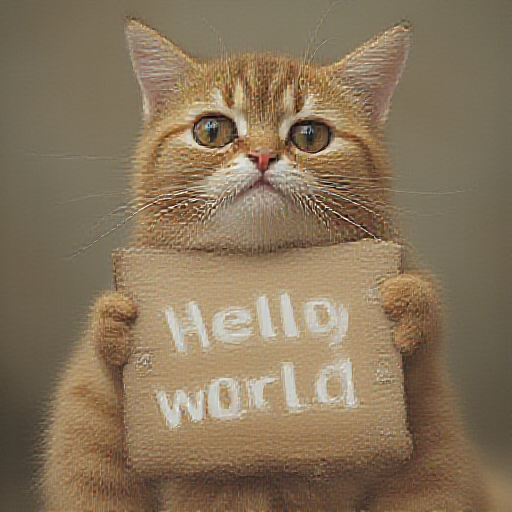

In [4]:
from IPython.display import display

display(image)

Quantizing a model in 4-bit

In [5]:
from diffusers import BitsAndBytesConfig as DiffusersBitsAndBytesConfig
from diffusers import FluxTransformer2DModel
from transformers import BitsAndBytesConfig as TransformersBitsAndBytesConfig
from transformers import T5EncoderModel

In [6]:
quant_config = TransformersBitsAndBytesConfig(load_in_4bit=True)

In [7]:
text_encoder_2_4bit = T5EncoderModel.from_pretrained(
    path,
    subfolder="text_encoder_2",
    quantization_config=quant_config,
    torch_dtype=torch.bfloat16,
)

`low_cpu_mem_usage` was None, now default to True since model is quantized.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
quant_config = DiffusersBitsAndBytesConfig(load_in_4bit=True, bnb_4bit_compute_dtype=torch.bfloat16)

In [9]:
transformer_4bit = FluxTransformer2DModel.from_pretrained(
    path,
    subfolder="transformer",
    quantization_config=quant_config,
    torch_dtype=torch.bfloat16,
)

In [10]:
pipe = FluxPipeline.from_pretrained(
    path,
    transformer=transformer_4bit,
    text_encoder_2=text_encoder_2_4bit,
    torch_dtype=torch.bfloat16,
)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

FluxPipeline {
  "_class_name": "FluxPipeline",
  "_diffusers_version": "0.32.2",
  "_name_or_path": "pretrained_models/FLUX.1-dev",
  "feature_extractor": [
    null,
    null
  ],
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "FlowMatchEulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "T5EncoderModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "T5TokenizerFast"
  ],
  "transformer": [
    "diffusers",
    "FluxTransformer2DModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [11]:
pipe_kwargs = {
    "prompt": "A cat holding a sign that says hello world",
    "height": 512,
    "width": 512,
    "guidance_scale": 3.5,
    "num_inference_steps": 5,
    "max_sequence_length": 512,
}

In [ ]:
image = pipe(**pipe_kwargs, generator=torch.manual_seed(0)).images[0]

  0%|          | 0/5 [00:00<?, ?it/s]

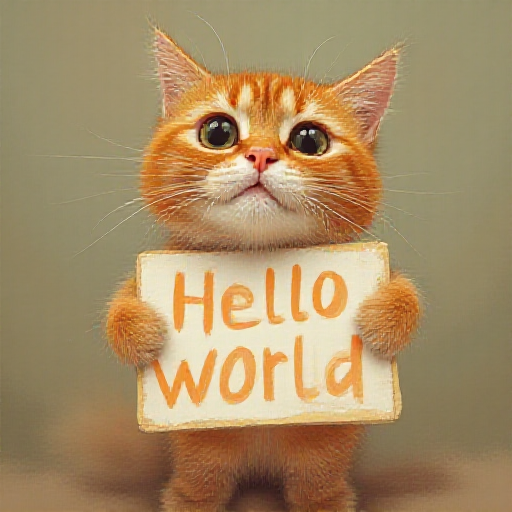

In [13]:
display(image)